In [1]:
import pandas as pd
import ast
import sqlite3

In [2]:
articles = pd.read_json('articles_with_sentiment.json')
prices = pd.read_json('stock_prices.json')

In [3]:
prices = prices[prices.index.year == 2020]
indices = []

for item in prices.columns.values:
    indices.append(ast.literal_eval(item))
    
prices.columns = pd.MultiIndex.from_tuples(indices)
prices = prices['Adj Close']
prices

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
2020-01-02,84.799667,28.982893,155.755661,73.894333,80.137352,82.064140,168.809998,84.001152,203.776108,334.429993,...,59.119480,99.746124,61.174900,55.990784,77.805443,98.133003,142.782532,259.140015,49.020840,132.432312
2020-01-03,83.438133,27.548195,155.765411,73.175919,79.376686,81.032066,166.820007,82.977112,203.436722,331.809998,...,59.403797,97.449951,60.683094,55.371170,78.263420,97.825645,142.409302,256.049988,48.329094,132.452072
2020-01-06,83.684799,27.219410,153.205490,73.759010,80.003113,82.218468,179.039993,83.411842,202.108246,333.709991,...,59.318504,95.418716,61.149014,55.676060,77.756744,97.768013,141.586273,258.010010,47.740170,131.435165
2020-01-07,83.941322,27.119778,151.388138,73.412109,79.546715,81.630096,180.350006,82.948135,197.744736,333.390015,...,59.195297,97.597153,60.648575,55.971107,77.464432,97.940895,141.461884,256.470001,47.450382,131.879471
2020-01-08,84.770073,27.737495,149.648956,74.593048,80.110504,82.421028,178.690002,83.286255,198.132629,337.869995,...,59.138432,97.322380,59.733959,56.561207,77.727509,98.113792,143.155777,247.639999,47.917782,131.593155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,116.487823,15.660000,158.205856,130.994537,97.521835,95.198929,303.410004,106.325668,253.501236,499.859985,...,62.861969,141.466354,38.760456,51.450127,98.975159,105.278343,143.968948,376.890015,42.045433,159.582977
2020-12-28,117.004166,16.059999,156.354813,135.679626,97.701271,95.032036,312.910004,105.776138,255.846100,498.950012,...,63.533100,140.998093,38.890907,51.936630,99.093636,107.471230,143.621674,382.589996,42.064835,161.241180
2020-12-29,116.408386,15.860000,154.277313,133.873077,98.881805,95.346191,320.929993,106.306046,253.954468,502.109985,...,63.630352,139.384033,38.452988,50.884190,98.244560,107.148163,147.055725,378.040009,41.492458,161.966003
2020-12-30,116.567268,16.150000,155.232376,132.731583,99.420128,95.189110,323.920013,106.413994,253.737732,497.450012,...,63.854065,141.575943,38.760456,51.092690,99.498413,107.206902,146.833847,383.750000,41.929016,163.107849


In [4]:
articles

,title,text,href,date,text_size,HKUST_title,HKUST_text,PROSUS_title,PROSUS_text
1496,Brown-Forman stock slips after profit misses o...,Shares of Jack Daniels parent Brown-Forman Cor...,https://www.marketwatch.com/story/brown-forman...,2020-12-08,153,-0.999502,0.985009,-0.973591,-0.973772
1498,This analysis of Wall Street stock ratings is ...,"In the financial media, “Wall Street” typicall...",https://www.marketwatch.com/story/this-analysi...,2020-09-07,272,0.000000,0.000000,0.000000,0.000000
1499,These 74 stocks in the S&P 500 hit all-time re...,U.S. stocks staged a broad rally Wednesday as ...,https://www.marketwatch.com/story/these-74-sto...,2020-09-03,206,0.991664,0.000000,0.794795,0.000000
1500,"Brown-Forman's stock slips, although earnings ...",Shares of Jack Daniel's parent Brown-Forman Co...,https://www.marketwatch.com/story/brown-forman...,2020-09-02,192,-0.999107,0.956672,-0.959359,-0.940531
1502,"Brown-Forman's stock gains after sales beat, a...","Shares of Brown-Forman Corp. BF.A,\n+0.38%\ned...",https://www.marketwatch.com/story/brown-forman...,2020-06-09,190,1.000000,-0.898049,0.954016,-0.970586
...,...,...,...,...,...,...,...,...,...
300602,Zimmer Biomet Holdings Inc. stock outperforms ...,Shares of Zimmer Biomet Holdings Inc. slumped ...,https://www.marketwatch.com/story/zimmer-biome...,2020-11-17,140,0.999948,-0.999502,0.935563,-0.974705
300603,Zimmer Biomet Holdings Inc. stock falls Monday...,Shares of Zimmer Biomet Holdings Inc. slumped ...,https://www.marketwatch.com/story/zimmer-biome...,2020-11-16,135,0.000000,0.421695,-0.966464,-0.963080
300604,Zimmer Biomet Holdings Inc. stock rises Friday...,Shares of Zimmer Biomet Holdings Inc. advanced...,https://www.marketwatch.com/story/zimmer-biome...,2020-11-13,143,0.999992,0.996182,0.915696,0.835485
300605,Zimmer Biomet Holdings Inc. stock falls Thursd...,Shares of Zimmer Biomet Holdings Inc. sank 0.6...,https://www.marketwatch.com/story/zimmer-biome...,2020-11-12,143,0.999999,-0.999222,-0.961002,-0.974901


In [5]:
articles[['HKUST_title', 'HKUST_text', 'PROSUS_title', 'PROSUS_text']].corr()

,HKUST_title,HKUST_text,PROSUS_title,PROSUS_text
HKUST_title,1.000000,0.534960,0.727255,0.307935
HKUST_text,0.534960,1.000000,0.638755,0.542050
PROSUS_title,0.727255,0.638755,1.000000,0.433470
PROSUS_text,0.307935,0.542050,0.433470,1.000000


In [6]:
#articles.drop(columns=['title', 'text', 'href']).to_sql(name='sentiment', con=sqlite3.connect('data.db'))

In [7]:
query = """select c.ticker, s.* from company as c, sentiment as s, article_company as a2c
where s."index" = a2c.article_id and c.company_id = a2c.company_id
order by c.name ASC, s."date" DESC;"""

In [8]:
con = sqlite3.connect('data.db')

cur = con.cursor()

output = [*cur.execute(query)]

con.close()

In [9]:
df = pd.DataFrame(output, columns=['asset', 'article_id', 'date', 'text_size', 
                                     'HKUST_title', 'HKUST_text', 'PROSUS_title', 'PROSUS_text'])

df

,asset,article_id,date,text_size,HKUST_title,HKUST_text,PROSUS_title,PROSUS_text
0,MMM,9800,2020-12-31 00:00:00,141,0.937854,0.999940,-0.499815,-0.862895
1,MMM,9801,2020-12-30 00:00:00,133,1.000000,0.998971,0.935766,-0.950361
2,MMM,9802,2020-12-29 00:00:00,135,0.000000,-0.996120,-0.953571,-0.969764
3,MMM,9804,2020-12-28 00:00:00,139,0.918633,0.995650,0.524388,0.871721
4,MMM,9805,2020-12-24 00:00:00,140,0.937854,0.997187,-0.499815,-0.907716
...,...,...,...,...,...,...,...,...
36784,EBAY,48217,2020-01-31 00:00:00,110,0.000000,0.999996,0.705051,-0.957836
36785,EBAY,139400,2020-01-28 00:00:00,124,-0.999999,-0.999929,-0.971361,-0.973419
36786,EBAY,48230,2020-01-27 00:00:00,247,0.000000,-0.998329,0.000000,-0.945259
36787,EBAY,139401,2020-01-17 00:00:00,280,0.000000,-0.999993,0.000000,-0.974516


In [10]:
hkust_title = df.groupby(by=['asset', 'date'], as_index=False).sum().pivot(index='date', columns='asset')['HKUST_title']
hkust_text = df.groupby(by=['asset', 'date'], as_index=False).sum().pivot(index='date', columns='asset')['HKUST_text']
prosus_title = df.groupby(by=['asset', 'date'], as_index=False).sum().pivot(index='date', columns='asset')['PROSUS_title']
prosus_text = df.groupby(by=['asset', 'date'], as_index=False).sum().pivot(index='date', columns='asset')['PROSUS_text']

In [11]:
#hkust_text['AAPL'].plot(figsize=(15,7))

In [12]:
hkust_title.index = pd.to_datetime(hkust_title.index)
hkust_text.index = pd.to_datetime(hkust_text.index)
prosus_title.index = pd.to_datetime(prosus_title.index)
prosus_text.index = pd.to_datetime(prosus_text.index)

In [17]:
hkust_title.fillna(value=0, inplace=True)
hkust_text.fillna(value=0, inplace=True)
prosus_title.fillna(value=0, inplace=True)
prosus_text.fillna(value=0, inplace=True)

In [13]:
dropped_assets = [*set(prices.columns).difference(hkust_title.columns)]

prices.drop(columns = dropped_assets, inplace=True)

In [14]:
import matplotlib.pyplot as plt

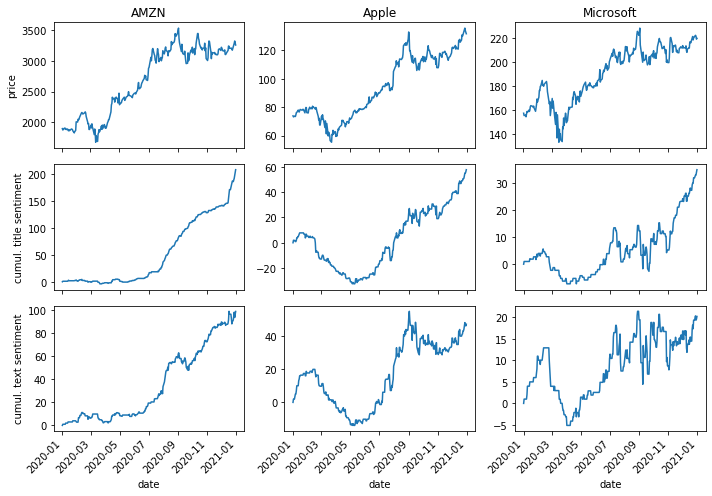

In [19]:
fig, ax = plt.subplots(3,3, figsize=(10,7))
ax[0,0].plot(prices['AMZN']);
ax[0,0].set_title('AMZN');
ax[0,0].set_ylabel('price');

ax[0,1].plot(prices['AAPL']);
ax[0,1].set_title('Apple');

ax[0,2].plot(prices['MSFT']);
ax[0,2].set_title('Microsoft');

ax[1,0].plot(hkust_title['AMZN'].cumsum());
ax[1,0].set_ylabel('cumul. title sentiment');

ax[1,1].plot(hkust_title['AAPL'].cumsum());

ax[1,2].plot(hkust_title['MSFT'].cumsum());

ax[2,0].plot(hkust_text['AMZN'].cumsum());
ax[2,0].set_ylabel('cumul. text sentiment');
ax[2,0].set_xlabel('date')

ax[2,1].plot(hkust_text['AAPL'].cumsum());
ax[2,1].set_xlabel('date')

ax[2,2].plot(hkust_text['MSFT'].cumsum());
ax[2,2].set_xlabel('date')

fig.autofmt_xdate(rotation=45)
fig.tight_layout()
fig.savefig('figure.jpg')